<a href="https://colab.research.google.com/github/pedroAndrad1/introducao_a_machine_learning/blob/master/introducao_ml_parte4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Vemos que o LinearSVC não é um estimador muito bom para resolver o problema em questão. Pois ele tem a limitação de trabalhar apenas com problemas linearmente separáveis, o que podemos ver nos gráficos que não é o caso. Outro problema que temos é que as features não estamos na mesma escala. E como estimadores trabalham com os valores de forma absoluta no pesos, isso influência muito na decisão. 

Aqui vamos colocar as features em mesma escala e usar um estimador, também da biblioteca sklearn, que não tenha a limitação de trabalhar apenas com problemas linearmente separáveis.

#Primeiro vou pegar um pouco do que foi feito na parte 3, para reaproveitar aqui.

In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split

uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
dados = pd.read_csv(uri)

a_renomear = {
    'expected_hours' : 'horas_esperadas',
    'price' : 'preco',
    'unfinished' : 'nao_finalizado'
}
dados = dados.rename(columns = a_renomear)
dados.head()

#Primeiro eu crio um dicionario
troca = {
    0 : 1,
    1 : 0
}
#Depois eu uso a funcao map na coluna de nao_finalizado e remapeio de acordo com o dicionario.
#A funcao vai me retornar uma nova coluna e eu armazeno esses valores na coluna finalizado que acabei de criar.
dados['finalizado'] = dados.nao_finalizado.map(troca)
dados.head()

#Fazendo o split

SEED = 20

x = dados[["horas_esperadas", "preco"]]
y = dados["nao_finalizado"]

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y,
                                                         random_state = SEED, test_size = 0.25,
                                                         stratify = y)

#1 Colocando as features em uma mesma escala.

Já com o dataset em mãos e já feito o split, vou colocar as features, o raw_treino_x e raw_teste_x, em uma mesma escala. Usando o StandardScaler do módulo preprocessing da biblioteca sklearn.

In [0]:
from sklearn.preprocessing import StandardScaler

#Instanciando o escalonador
scaler = StandardScaler()

#Agora, o escolanador precisa tambem se ajustar ao dados antes de fazer o escalonamento.
scaler.fit(raw_treino_x) #Não preciso fazer o mesmo para o raw_teste_x tambem. O raw_treino_x ja e suficiente.

#Agora, posso transformar as features para as novas features de mesma escala.
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

#Aqui tem um porem, antes o raw_treino_x e raw_teste_x era um dataframe do pandas.
#Mas o trasnform() devolve um array de arrays que representa aquele dataframe.
#Entao a forma de trabalhar muda um pouco, mas nada demais.

treino_x

array([[ 0.63855841,  0.2799037 ],
       [ 0.11435093, -0.33417309],
       [ 1.33750172,  1.90151475],
       ...,
       [-0.75932821, -0.55223622],
       [ 0.32403392, -0.18886321],
       [ 1.0579244 ,  1.43628718]])

#2 Usando um estimador não linear

Aqui vamos usar nosso novo estimador e ver a sua acurácia. O estimador vai ser o SVC (Support Vector Classification)
do mesmo módulo svm (Support Vector Machines)  da biblioteca skleran.

In [0]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

#Assim como o perceptron e o LinearSVC o SVC tambem usa uma constante, o famoso vies. 
#Este e gerado aleatoriamente, mas podemos usar uma seed para enviesar essa geracao aleatoria.
#Assim podemos replicar o processo.
SEED = 5

modelo = SVC()
modelo.fit(treino_x, treino_y)
estimativas = modelo.predict(teste_x)

acuracia = accuracy_score(estimativas, teste_y) * 100
print("A acurácia foi %.2f%%" % acuracia)


A acurácia foi 66.67%


#3 Vendo a curva de decisão.

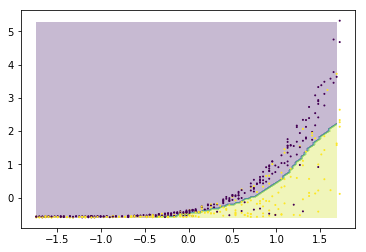

In [0]:
data_x = teste_x[:, 0] # Estou pegando todos os elementos, : , da coluna 0. Que são a primeita feature
data_y = teste_x[:, 1] # Estou pegando todos os elementos, : , da coluna 1; Que são a segunda features.

#Agora fazendo os roles para calcular as previsoes para todos os pontos possiveis e plotando isso em um grafico.
#Essa parte nao entendi bem.

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

import numpy as np

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(data_x, data_y, c=teste_y, s=1)

#Lembrando que a parte amarelo são as estimativas iguais a 1 e a azul são as iguais a 0.
#Da pra ver que a curva de decisao agora foi bem melhor que a anterior.